In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                       download=True,
                                       transform=transforms.ToTensor())

100%|█████████▉| 170483712/170498071 [09:15<00:00, 368871.10it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


In [8]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=8,
                                         shuffle=True,
                                         num_workers=2) 

In [10]:
testset = torchvision.datasets.CIFAR10(root='./data',
                                      train=False,
                                      download=True,
                                      transform = transforms.ToTensor())

Files already downloaded and verified


In [11]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
testloader = torch.utils.data.DataLoader(testset,
                                        batch_size=8,
                                        shuffle=False,
                                        num_workers=2)

In [13]:
labels = ('plane','car','bird','cat','deer',
         'dog','frog','horse','ship','truck')

In [14]:
import matplotlib.pyplot as plt 
import numpy as np 

In [15]:
images_batch, labels_batch = iter(trainloader).next()

In [16]:
images_batch.shape

torch.Size([8, 3, 32, 32])

In [17]:
img = torchvision.utils.make_grid(images_batch)

In [18]:
img.shape

torch.Size([3, 36, 274])

In [19]:
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

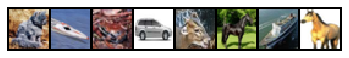

In [20]:
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [21]:
import torch.nn as nn

In [25]:
in_size = 3
hid1_size = 16
hid2_size = 32
out_size = len(labels)
k_conv_size = 5

In [30]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size,k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size)
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out
    

In [31]:
model =ConvNet()

In [33]:
learning_rate = 0.0001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),
                            lr = learning_rate)

In [34]:
total_step = len(trainloader)
num_epochs = 5

In [37]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 ==0:
            print('Epoch [{}/{}] step [{}/{}], loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
        

Epoch [1/5] step [2000/6250], loss: 0.8577
Epoch [1/5] step [4000/6250], loss: 1.8446
Epoch [1/5] step [6000/6250], loss: 1.9796
Epoch [2/5] step [2000/6250], loss: 1.7486
Epoch [2/5] step [4000/6250], loss: 0.8974
Epoch [2/5] step [6000/6250], loss: 1.2731
Epoch [3/5] step [2000/6250], loss: 0.6241
Epoch [3/5] step [4000/6250], loss: 1.1771
Epoch [3/5] step [6000/6250], loss: 1.0148
Epoch [4/5] step [2000/6250], loss: 1.2563
Epoch [4/5] step [4000/6250], loss: 1.2075
Epoch [4/5] step [6000/6250], loss: 0.9681
Epoch [5/5] step [2000/6250], loss: 1.3565
Epoch [5/5] step [4000/6250], loss: 1.4714
Epoch [5/5] step [6000/6250], loss: 0.8718


In [38]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        
        output = model(images)
        _,predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the model on 1000 test test images: {}%'
         .format(100*correct/total))
        

Accuracy of the model on 1000 test test images: 66.34%
